# VeryBuy Data Analysis

In [4]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [5]:
data_1 = pd.read_csv(r"C:\Users\b0770\Desktop\VeryBuy csv\Very_buy1.csv")
data = pd.read_csv(r"C:\Users\b0770\Desktop\VeryBuy csv\Very_buy2.csv")
data = data.append(data_1)

C:\Users\b0770\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


General Statistic

In [3]:
data.describe()

,Unnamed: 0,mid,when,pit-number,parent-category-id,gid,amount,revenue,shipping_fee,transaction_id
count,6.538089e+06,2.777980e+06,6.538089e+06,6.322353e+06,1.238629e+06,1.097402e+06,2063.000000,1346.000000,1346.000000,1.346000e+03
mean,1.634602e+06,9.491849e+05,1.612171e+09,2.277368e+04,3.680286e+00,6.476222e+07,1.019389,3541.140416,51.337296,9.992390e+13
std,9.438313e+05,3.132867e+05,1.828039e+04,3.270591e+05,4.318191e+00,1.327769e+05,0.191001,4452.833054,53.302761,2.032835e+02
min,0.000000e+00,2.958000e+03,1.612063e+09,1.000000e+00,0.000000e+00,6.229997e+07,1.000000,0.000000,0.000000,9.992390e+13
25%,8.172610e+05,7.736120e+05,1.612155e+09,6.000000e+00,1.000000e+00,6.473986e+07,1.000000,1109.500000,0.000000,9.992390e+13
50%,1.634522e+06,1.064202e+06,1.612173e+09,2.200000e+01,2.000000e+00,6.482430e+07,1.000000,1870.500000,70.000000,9.992390e+13
75%,2.451783e+06,1.212984e+06,1.612187e+09,1.360000e+02,5.000000e+00,6.483916e+07,1.000000,3446.750000,80.000000,9.992390e+13
max,3.291980e+06,1.247924e+06,1.612203e+09,5.269710e+06,1.010000e+02,6.484042e+07,4.000000,23916.000000,250.000000,9.992390e+13


Percentage of buying customer

In [6]:
nd = data[data.event == "buy"]

In [ ]:
nd["mid"]

In [ ]:
total_customer_numb = len(set(data["mid"]))

In [ ]:
total_customer_numb

In [ ]:
len(set(data[data.event == "buy"]["mid"])) / len(set(data["mid"]))

In [121]:
data["shipping_fee"].fillna(0).sum()

69100.0

In [4]:
time = data["when"]

In [5]:
data["time"] = pd.to_datetime(pd.Series(time), unit = "s")

以每分鐘進行切割

In [6]:
data["time index"] = 60*(data["time"].dt.hour) + (data["time"].dt.minute)

In [7]:
groupby_time = data.groupby("time index")

# Revenue plot

In [8]:
revenue_sum = groupby_time["revenue"].sum().fillna(0)
revenue_std = groupby_time["revenue"].std().fillna(0)
revenue_mean = groupby_time["revenue"].mean().fillna(0)
revenue_max = groupby_time["revenue"].max().fillna(0)

在早上起來時有最高的購買次數

In [30]:
buy = data.groupby(["time index","event"]).size().reset_index()
buy = buy[buy.event == "buy"]

<ipython-input-34-ce04f45cfadf>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(revenue_sum.keys(), revenue_sum.values / revenue_std.values, label = "std sum")
<ipython-input-34-ce04f45cfadf>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(revenue_sum.keys(), revenue_sum.values / revenue_std.values, label = "std sum")


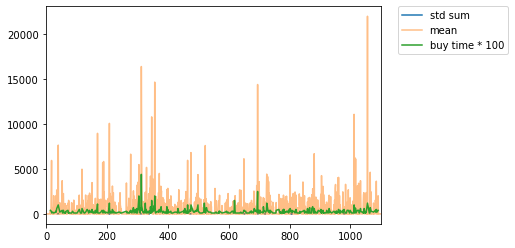

In [34]:
#plt.plot(revenue_sum.keys(), revenue_sum.values, label = "sum")
#plt.plot(revenue_sum.keys(), revenue_sum.values / revenue_std.values, label = "std sum")
plt.plot(revenue_mean.keys(), revenue_mean.values,alpha = 0.5 ,label = "mean")
plt.plot(buy["time index"], 100 * buy[0], label = "buy time * 100")
#plt.plot(revenue_max.keys(), revenue_max.values, label = "max")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 1100)
plt.show()

# Event Plot and Corr

In [9]:
event_series = data.groupby(["time index","event"]).size()

NameError: name 'df' is not defined

In [87]:
event_frame = event_series.reset_index()

In [102]:
def calculate_rate(data_frame, column_name):
    data_frame = data_frame.reset_index(drop = True)
    rate_list = []
    rate_list.append(0)
    temp = data_frame.loc[0,column_name]
    for i in range(1,len(data_frame)):
        rate_list.append((data_frame.loc[i, column_name] - temp) / temp)
        temp = data_frame.loc[i, column_name]
    data_frame["rate"] = rate_list
    return data_frame

各項目在不同時點的出現次數

In [105]:
calculate_rate(atc, 0)

,time index,event,0,rate
0,0,atc,1,0.000000
1,1,atc,1,0.000000
2,2,atc,12,11.000000
3,3,atc,5,-0.583333
4,4,atc,5,0.000000
...,...,...,...,...
1087,1088,atc,10,0.000000
1088,1089,atc,5,-0.500000
1089,1090,atc,6,0.200000
1090,1091,atc,6,0.000000


In [7]:
atc = event_frame[event_frame.event == "atc"]
plt.plot(atc["time index"], atc[0], label = "atc")
pageview = event_frame[event_frame.event == "pageview"]
plt.plot(pageview["time index"], pageview[0], label = "pageview")
click = event_frame[event_frame.event == "click"]
plt.plot(click["time index"], click[0], label = "click")
love = event_frame[event_frame.event == "love"]
plt.plot(love["time index"], love[0], label = "love")
impression = event_frame[event_frame.event == "impression"]
plt.plot(impression["time index"], impression[0], label = "impression")
buy = event_frame[event_frame.event == "buy"]
plt.plot(buy["time index"], buy[0], label = "buy")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 1100)
plt.show()

NameError: name 'event_frame' is not defined

加權後的圖(應該要改為標準化)

In [2]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [4]:
atc = event_frame[event_frame.event == "atc"]
plt.plot(atc["time index"], 50*atc[0], label = "50*atc")
pageview = event_frame[event_frame.event == "pageview"]
plt.plot(pageview["time index"], pageview[0], label = "pageview")
click = event_frame[event_frame.event == "click"]
plt.plot(click["time index"], click[0], label = "click")
love = event_frame[event_frame.event == "love"]
plt.plot(love["time index"], love[0], label = "love")
impression = event_frame[event_frame.event == "impression"]
plt.plot(impression["time index"], impression[0], label = "impression")
buy = event_frame[event_frame.event == "buy"]
plt.plot(buy["time index"], 50*buy[0], label = "50*buy")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0, 1100)
plt.show()

NameError: name 'event_frame' is not defined

In [76]:
atc[0]
#pageview[0]

0        1
2        1
6       12
10       5
15       5
        ..
5906    10
5911     5
5916     6
5921     6
5927     4
Name: 0, Length: 1092, dtype: int64

In [96]:
event_times = pd.DataFrame(event_series.unstack(level=1))

In [99]:
event_times = event_times.fillna(0)

In [89]:
#event_times = pd.DataFrame(atc[0], pageview[0], click[0], buy[0])
event_times["atc"] = atc[0]
event_times["pageview"] = pageview[0]
event_times["click"] = click[0]
event_times["buy"] = buy[0]

找出event彼此之間的關聯性
* click 與 atc 之間的關聯性很高，代表點頁面後有較高的機率把商品放入購物車 //Q:ATC一定要Click
* buy 與 atc 之間幾乎沒有關連性，代表ATC後，最後買的機率非常非常低

In [100]:
event_times = event_times.fillna(0)
event_times.corr()

event,atc,buy,click,impression,love,pageview,view
event,,,,,,,
atc,1.000000,0.032962,0.491384,0.135088,0.022715,0.459307,0.437527
buy,0.032962,1.000000,0.028586,-0.017190,-0.006791,0.035456,0.024826
click,0.491384,0.028586,1.000000,0.296598,0.053403,0.938337,0.905921
impression,0.135088,-0.017190,0.296598,1.000000,0.070696,0.278748,0.264322
love,0.022715,-0.006791,0.053403,0.070696,1.000000,-0.003766,0.016859
pageview,0.459307,0.035456,0.938337,0.278748,-0.003766,1.000000,0.924790
view,0.437527,0.024826,0.905921,0.264322,0.016859,0.924790,1.000000


In [106]:
atc = calculate_rate(atc, 0)
pageview = calculate_rate(pageview, 0)

In [107]:
click["rate_page_view"] = pageview["rate"]
click["rate_atc"] = atc["rate"]
click = click.fillna(0)

<ipython-input-107-4740a7a4b4e0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click["rate_page_view"] = pageview["rate"]
<ipython-input-107-4740a7a4b4e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  click["rate_atc"] = atc["rate"]


In [108]:
data["revenue"] = data["revenue"].fillna(0)

由於 atc 與 buy之間沒有高關聯性，因此想要分析區勢上是否會有相關

In [109]:
click.drop(columns = [0, "time index"]).corr()

,rate_page_view,rate_atc
rate_page_view,1.000000,0.061881
rate_atc,0.061881,1.000000


由以上結果發現到基本上沒有太高的相關性，因此接下來利用auto correlation的方式來分析關聯性

In [110]:
temp_click = click.drop(columns = [0, "time index"])
temp_click["rate_page_view"] = temp_click["rate_page_view"].shift(-1)
temp_click.corr()
#df['gdp'] = df['gdp'].shift(-1)
#type(temp_click.squeeze())

,rate_page_view,rate_atc
rate_page_view,1.000000,-0.056225
rate_atc,-0.056225,1.000000


In [111]:
atc = calculate_rate(atc, 0)
pageview = calculate_rate(pageview, 0)
click = calculate_rate(click, 0)

In [114]:
click.head()

,time index,event,0,rate_page_view,rate_atc,rate
0,1,click,43,0.035000,-0.583333,0.000000
1,2,click,91,0.160000,-0.333333,1.116279
2,3,click,96,-0.056604,-0.166667,0.054945
3,4,click,101,0.138889,-0.222222,0.052083
4,5,click,100,-0.028571,0.333333,-0.009901


In [112]:
click["rate"].squeeze().autocorr(1)

-0.008435247524874847

# Rate

What Happen

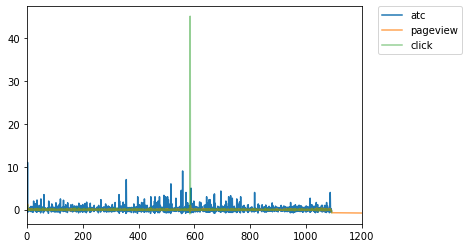

In [115]:
plt.plot(atc["time index"], atc["rate"],alpha = 1 ,label = "atc")
plt.plot(pageview["time index"], pageview["rate"],alpha = 0.7 ,label = "pageview")
plt.plot(click["time index"], click["rate"],alpha = 0.5, label = "click")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim([0, 1200])
plt.show()

In [116]:
where_event_rel = data.groupby(["where", "event"]).size()

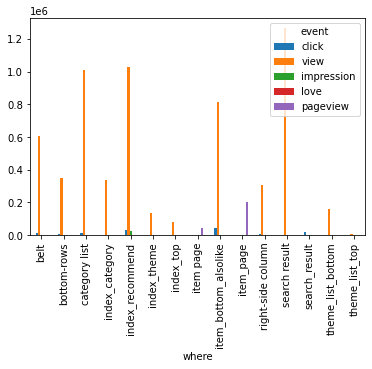

In [117]:
#where_event_rel
where_event_rel.unstack(level=1).plot(kind='bar', subplots=False)

In [725]:
data["revenue"] = data["revenue"].fillna(0)

In [118]:
data.groupby(["mid","when" ,"event", "revenue"]).size().reset_index().head()

,mid,when,event,revenue,0
0,2958.0,1612139846,pageview,0.0,1
1,2958.0,1612139847,view,0.0,13
2,4102.0,1612198197,view,0.0,4
3,4102.0,1612198314,view,0.0,4
4,4102.0,1612198464,pageview,0.0,1


In [605]:
item_page = where_time[where_time["where"] == "item page"]
item_page = where_time[where_time["where"] == "item page"]

(0.0, 1200.0)

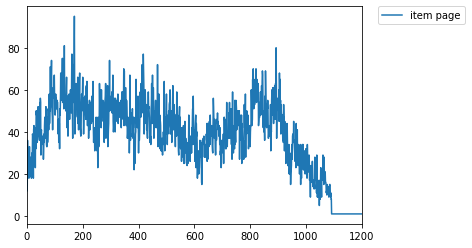

In [606]:
plt.plot(item_page["time index"], item_page[0], label = "item page")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlim(0,1200)

In [643]:
data["revenue"].mean()

3541.140416047548

In [609]:
revenue = data.groupby("when").sum()["revenue"]

In [610]:
count = data.groupby("when").count()["revenue"]

In [611]:
with np.errstate(divide='ignore', invalid='ignore'):
    c = np.true_divide(revenue.values,count.values)
    c[c == np.inf] = 0
    c = np.nan_to_num(c)


In [612]:
time = revenue.index
sp = (revenue.values) / count.values
#ct = count.values

<ipython-input-612-4656648e0a2f>:2: RuntimeWarning: invalid value encountered in true_divide
  sp = (revenue.values) / count.values


In [161]:
(sp[0])

array([6.602385e+06, 0.000000e+00, 0.000000e+00, 5.500000e+01,
       5.500000e+01, 6.483072e+08, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 0.000000e+00])

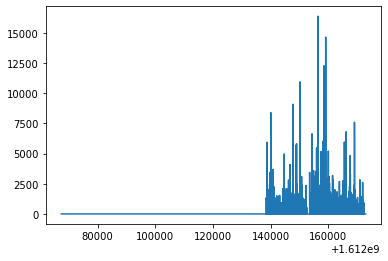

In [175]:
plt.plot(time, c)

In [9]:
event_count = data.groupby("event").count()["Unnamed: 0"]

In [19]:
event_count.values

array([   4428,     735,   70852,   11763,      50,  126852, 3031428],
      dtype=int64)

In [20]:
event_list = list(event_count.index)
event_value = list(event_count.values)

In [16]:
import matplotlib.pyplot as plt

<BarContainer object of 7 artists>

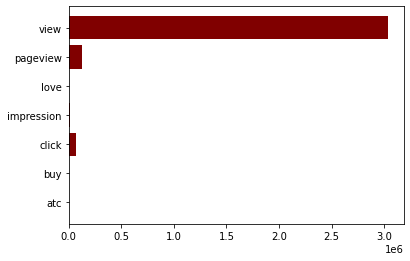

In [30]:
plt.barh(event_list, event_value, color='maroon')

In [34]:
event_count

event
atc              4428
buy               735
click           70852
impression      11763
love               50
pageview       126852
view          3031428
Name: Unnamed: 0, dtype: int64

In [75]:
event_count["atc"] / event_count["pageview"]

0.034906820546778926

In [61]:
event_count["buy"] / event_count["atc"]

0.1659891598915989

What next:
* what happen to click
* predict when the customer will buy and Add to cart
* get the relationship of part 2
* split customer database and transaction data (整體資料基本上沒啥預測能力)(無線性關係)

# Personal Data Analysis

In [48]:
from os import listdir
from os.path import isfile, join
import os
import gc

In [52]:
 gc.collect()

563

In [49]:
file_name = []

for file in os.listdir(r"C:\Users\b0770\Desktop\VeryBuy csv"):
    file_name.append(os.path.join(r"C:\Users\b0770\Desktop\VeryBuy csv", file))

In [54]:
customer_list = []

for i in(file_name):
    data_1 = pd.read_csv(i, low_memory=False)
    customer_list = customer_list + list(data_1[data_1["event"] == "buy"].mid)

In [56]:
customer_buying_list = (list(set(customer_list)))

In [57]:
customer_buying_list.sort()

In [58]:
(buy_customer_data).head()

,Unnamed: 0,mid,token,platform,device,login,when,event,where,pit-number,...,session-id,parent-category-id,gid,deviceType,theme-subject,theme-style,revenue,shipping_fee,transaction_id,amount
2,2,1135146.0,d213e100430fad7744ef66c502b0fcfe,ios,phone,True,1612137691,view,item_bottom_alsolike,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1135146.0,d213e100430fad7744ef66c502b0fcfe,ios,phone,True,1612137691,view,item_bottom_alsolike,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1135146.0,d213e100430fad7744ef66c502b0fcfe,ios,phone,True,1612137691,view,item_bottom_alsolike,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1135146.0,d213e100430fad7744ef66c502b0fcfe,ios,phone,True,1612137691,view,item_bottom_alsolike,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,13,1240636.0,cc7f2928c64bb64a29a983415429c816,ios,phone,True,1612137692,view,category list,17.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
buy_customer_data.head()

,Unnamed: 0,mid,token,platform,device,login,when,event,where,pit-number,...,session-id,parent-category-id,gid,deviceType,theme-subject,theme-style,revenue,shipping_fee,transaction_id,amount
2,2,1135146.0,d213e100430fad7744ef66c502b0fcfe,ios,phone,True,1612137691,view,item_bottom_alsolike,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1135146.0,d213e100430fad7744ef66c502b0fcfe,ios,phone,True,1612137691,view,item_bottom_alsolike,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1135146.0,d213e100430fad7744ef66c502b0fcfe,ios,phone,True,1612137691,view,item_bottom_alsolike,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,5,1135146.0,d213e100430fad7744ef66c502b0fcfe,ios,phone,True,1612137691,view,item_bottom_alsolike,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,13,1240636.0,cc7f2928c64bb64a29a983415429c816,ios,phone,True,1612137692,view,category list,17.0,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
buy_customer_data = pd.DataFrame()
count = 1
index = 0


for i in(file_name):
    gc.collect()
    if index < 37:
        index = index + 1
        continue
    print(index)
    index = index + 1
    try:
        data_1 = pd.read_csv(i)
        buy_customer_data = buy_customer_data.append(data_1[data_1["mid"].isin(customer_list)])
    except:
        count = count + 1
        buy_customer_data.to_csv("buy_customer_data.csv"+str(count))
        buy_customer_data = pd.DataFrame()
        data_1 = pd.read_csv(i)
        buy_customer_data = buy_customer_data.append(data_1[data_1["mid"].isin(customer_list)])

37
38
39
40
41
42
43
44


C:\Users\b0770\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


45
46


C:\Users\b0770\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


47


C:\Users\b0770\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (17,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


48
49
50
51
52
53
54
55
56
57
58
59
60


In [68]:
count = count+1

In [69]:
buy_customer_data.to_csv("buy_customer_data.csv"+str(count))